<a href="https://colab.research.google.com/github/TeddyAbraham/Mart-case-study2/blob/main/walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import poisson, expon, geom, norm, binom, boxcox, stats
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
walmart = pd.read_csv('walmart_data.txt')
walmart.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422


In [ ]:
walmart.describe(include=object)

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,547391,547391,547391,547391,547391
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,412171,218661,230114,192845


In [ ]:
walmart.shape
# This data has 550068 rows and 10 columns

(550068, 10)

In [ ]:
for i in walmart.columns:
  print(i, ':', walmart[i].nunique())
# Purchase is continious all other are category

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105


In [ ]:
walmart.isnull().sum()
# There are no null in any of the columns.

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [ ]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
walmart.Purchase.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [ ]:
walmart['Purchase'].mean() - walmart['Purchase'].median()

1157.6271951858907

- Since all are category but  'Purchase' is continious we will check for outliers only here.
- Also we see here with that there is a significant difference between Purchase(mean- 9263) and Purchase(median- 8047) (ie 1157).

# Identifying & treating Outliers

<Axes: ylabel='Purchase'>

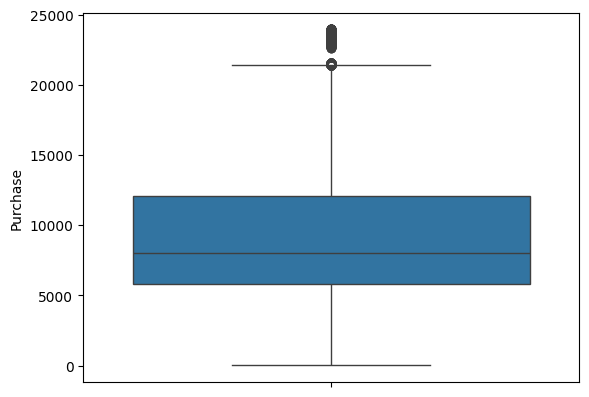

In [ ]:
sns.boxplot(walmart['Purchase'])

In [ ]:
walmart['Purchase'] = pd.to_numeric(walmart['Purchase'], errors='coerce')

Q1 = walmart['Purchase'].quantile(0.25)
Q3 = walmart['Purchase'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = walmart[(walmart['Purchase'] < lower_bound) | (walmart['Purchase'] > upper_bound)]
print(lower_bound, upper_bound)
outliers.shape

-3523.5 21400.5


(2677, 10)

In [ ]:
walmart = walmart[(walmart['Purchase'] >= lower_bound) & (walmart['Purchase'] <= upper_bound)]
walmart.shape

# if we dont want to delete the outliers we can also use clip function, however here as per the requirement mention we go with deleting the outliers
# walmart['Purchase'] = np.clip(walmart['Purchase'], lower_bound, upper_bound )

(547391, 10)

Since upper_bound is 21400.5 the purchase value above it are all **outliers**

There were 50068 rows, after removing the outliers we now get 547391 rows, as (outliers-2677) were removed

# Gender Analysis:

In [ ]:
gender = walmart.groupby('Gender')['Purchase'].sum()
gender

,Purchase
Gender,
F,1172499251
M,3861104315


In [ ]:
walmart.Gender.value_counts(normalize=True)

,proportion
Gender,
M,0.752974
F,0.247026


In [ ]:
walmart.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135220.0,8671.049039,4679.058483,12.0,5429.0,7906.0,11064.0,21398.0
M,412171.0,9367.724355,5009.234088,12.0,5852.0,8089.0,12247.0,21399.0


In [ ]:
# Ho - spend of women = spend of men
# Ha - spend of women != spend of men

In [ ]:
# sample_size = 300
# iterations = 1000
# with a smaller sample size the confidance Interval at 95% for males was - 8797.29 to 9925.92 and for female it was - (8125.94to  9223.01).
# since the sample size and iteration is small we can see there there is a Overlapping interval, so we will try increasing these

In [ ]:
sample_size = 3000
iterations = 10000

In [ ]:
walmart_males = walmart[walmart.Gender=='M']
male_spend = []
for i in range(iterations):
  male_spend.append(walmart_males.sample(sample_size)['Purchase'].mean())

In [ ]:
walmart_female = walmart[walmart.Gender == 'F']
female_spend = []
for i in range(iterations):
  female_spend.append(walmart_female.sample(sample_size)['Purchase'].mean())

9367.723604133334


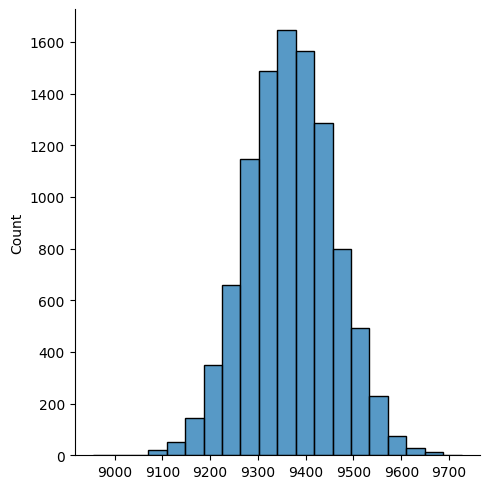

In [ ]:
print(np.mean(male_spend))
sns.displot(male_spend, bins = 20)
# After expanding the sample size we have now been able to get a bell with less spread, As the size increase the distribution reduces

8671.282006533333


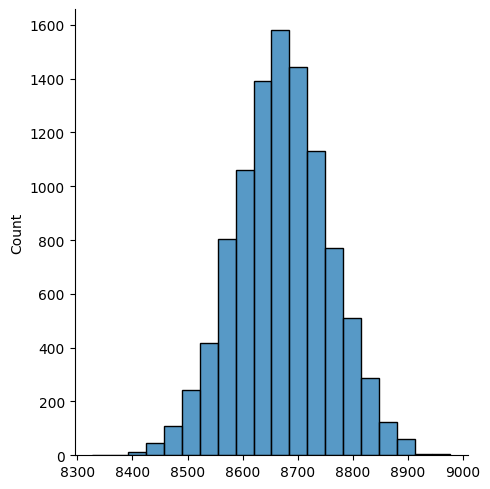

In [ ]:
print(np.mean(female_spend))
sns.displot(female_spend, bins = 20)

In [ ]:
zat90 = norm.ppf(.90)
zat95 = norm.ppf(.95)
zat99 = norm.ppf(.99)
# we will be checking confidance interval at 90%, 95% as well as 99%

In [ ]:
min_male_90 = np.mean(male_spend) - zat90*np.std(male_spend)
max_male_90 = np.mean(male_spend) + zat90*np.std(male_spend)

min_male_95 = np.mean(male_spend) - zat95*np.std(male_spend)
max_male_95 = np.mean(male_spend) + zat95*np.std(male_spend)

min_male_99 = np.mean(male_spend) - zat99*np.std(male_spend)
max_male_99 = np.mean(male_spend) + zat99*np.std(male_spend)

print('min_male_90 : ',min_male_90, '   max_male_90 :', max_male_90)
print('min_male_95 : ',min_male_95, '   max_male_95 :', max_male_95)
print('min_male_99 : ',min_male_99, '   max_male_99 :', max_male_99)

min_male_90 :  9250.87568939933    max_male_90 : 9484.571518867338
min_male_95 :  9217.750929198271    max_male_95 : 9517.696279068397
min_male_99 :  9155.614387980148    max_male_99 : 9579.832820286521


In [ ]:
min_female_90 = np.mean(female_spend) - zat90*np.std(female_spend)
max_female_90 = np.mean(female_spend) + zat90*np.std(female_spend)

min_female_95 = np.mean(female_spend) - zat95*np.std(female_spend)
max_female_95 = np.mean(female_spend) + zat95*np.std(female_spend)

min_female_99 = np.mean(female_spend) - zat99*np.std(female_spend)
max_female_99 = np.mean(female_spend) + zat99*np.std(female_spend)

print('min_female_90 : ',min_female_90, '   max_female_90 :', max_female_90)
print('min_female_95 : ',min_female_95, '   max_female_95 :', max_female_95)
print('min_female_99 : ',min_female_99, '   max_female_99 :', max_female_99)

min_female_90 :  8562.350262517512    max_female_90 : 8780.213750549154
min_female_95 :  8531.46962671822    max_female_95 : 8811.094386348444
min_female_99 :  8473.542689661537    max_female_99 : 8869.021323405128


* As we can see there are no overlapping (at all three confidance Intervals), we can understand that the spending habbit of male is significantly more than females.
- Thus we **Reject the Null Hypothesis**
* We can therefor suggest to have more *high price products for males*



# Marital_status Analysis

In [ ]:
walmart.groupby('Marital_Status')['Age'].describe()

,count,unique,top,freq
Marital_Status,,,,
0,323242,7,26-35,132727
1,224149,6,26-35,85934


we considered 0 as Unmaried and 1 as Married

In [ ]:
# Ho - single_spend = married_spend
# Ha - single_spend != married_spend

In [ ]:
# Expanding the data by taking bigger sample size and looping it in multiple iterations
walmart_singles = walmart[walmart.Marital_Status==0]
single_spend = []
for i in range(iterations):
  single_spend.append(walmart_singles.sample(sample_size)['Purchase'].mean())

walmart_married = walmart[walmart.Marital_Status==1]
married_spend = []
for i in range(iterations):
  married_spend.append(walmart_married.sample(sample_size)['Purchase'].mean())

In [ ]:
# Taking the Confidance Interval and checking for overlapping
min_single_spend = np.mean(single_spend) - zat95*np.std(single_spend)
max_single_spend = np.mean(single_spend) + zat95*np.std(single_spend)

min_married_spend = np.mean(married_spend) - zat95*np.std(married_spend)
max_married_spend = np.mean(married_spend) + zat95*np.std(married_spend)

print('min_single_spend : ',min_single_spend, '   max_single_spend :', max_single_spend)
print('min_married_spend : ',min_married_spend, '   max_married_spend :', max_married_spend)

min_single_spend :  9051.689506003178    max_single_spend : 9351.485464196823
min_married_spend :  9038.866718895108    max_married_spend : 9332.90320977156


There is a clear overlapping, It means we **Fail To Reject the Null Hypothesis**. This means there is *no significant difference* between the purchase behaviour between Married and Unmarried.

# Age Analysis:

In [ ]:
from scipy.stats import f_oneway # Numeric Vs categorical for many categories
from scipy.stats import ttest_ind # Numeric Vs categorical

In [ ]:
# H0: All groups have the same mean
# Ha: One or more groups have different mean

In [ ]:
walmart.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
till_17 = walmart[walmart['Age']=='0-17']['Purchase']
till_25 = walmart[walmart['Age']=='18-25']['Purchase']
till_35 = walmart[walmart['Age']=='26-35']['Purchase']
till_45 = walmart[walmart['Age']=='36-45']['Purchase']
till_50 = walmart[walmart['Age']=='46-50']['Purchase']
till_55 = walmart[walmart['Age']=='51-55']['Purchase']
above55 = walmart[walmart['Age']=='55+']['Purchase']

In [ ]:
f_stats, p_value = f_oneway(till_17, till_25, till_35, till_45, till_50, till_55, above55)

print("test statistic:",f_stats)
print("p_value:",p_value)

test statistic: 32.07223420824451
p_value: 7.855203479632149e-39


In [ ]:
if p_value < 0.05:  # checking at 95% >> In order to check at 90% or 99% we need to use (p_value < .1) or (p_value < 0.01)  <<
    print("Reject H0")
    print("Atleast one group have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

Reject H0
Atleast one group have different mean


In [ ]:
#-----------------------------------------------------------------------------------------------------------------------

,Purchase
Gender,
F,1172499251
M,3861104315


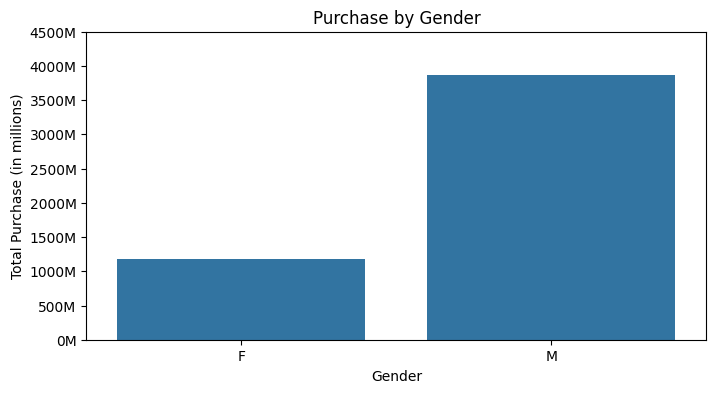

,Purchase
Age,
0-17,133295464
18-25,906326568
26-35,2010253327
36-45,1012493010
46-50,414839340
51-55,359878441
55+,196517416


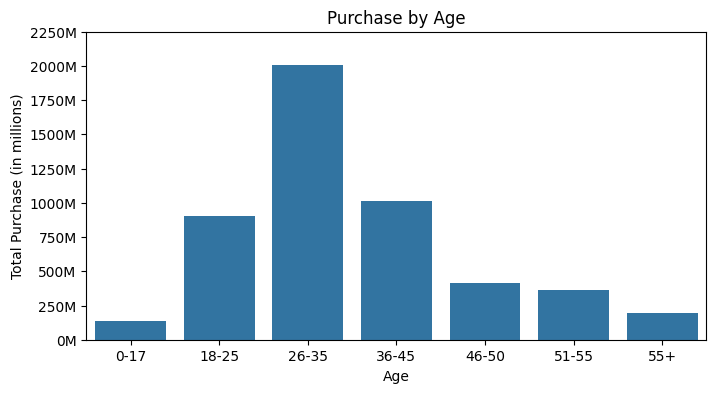

,Purchase
Occupation,
0,627775761
1,418737985
2,234467625
3,160095937
4,660013132
5,112633901
6,186221551
7,551375445
8,14598451


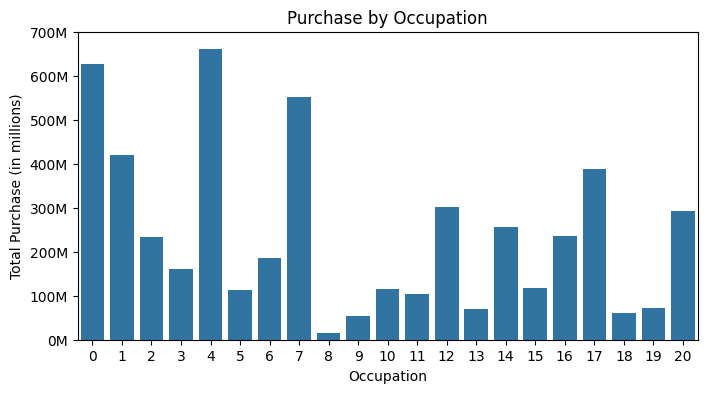

,Purchase
City_Category,
A,1300587440
B,2090931484
C,1642084642


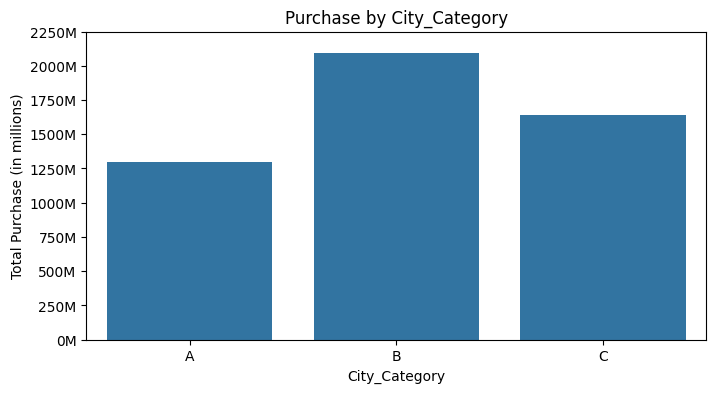

,Purchase
Stay_In_Current_City_Years,
0,674566543
1,1770177464
2,938642679
3,873709251
4+,776507629


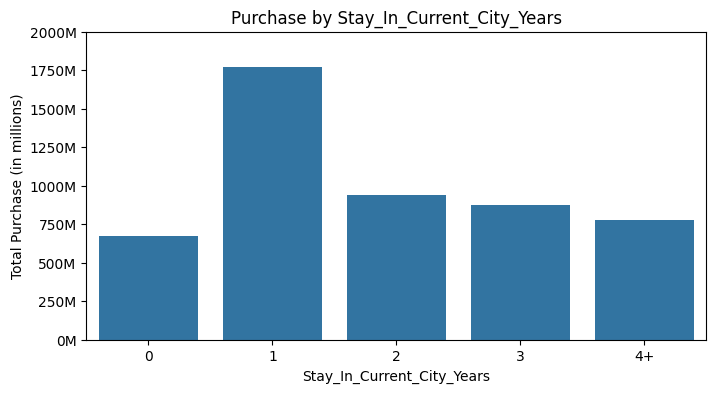

,Purchase
Marital_Status,
0,2974337720
1,2059265846


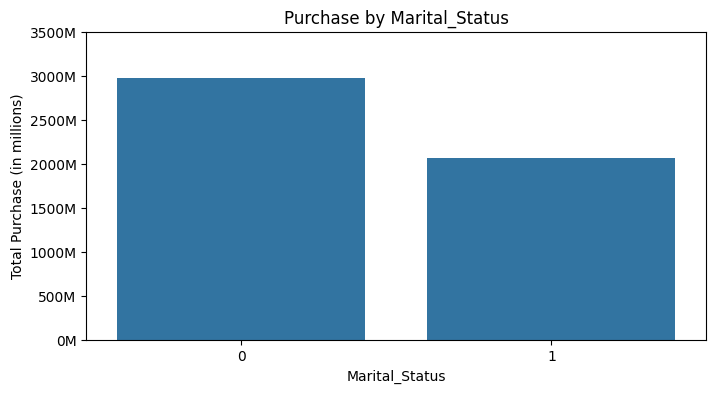

,Purchase
Product_Category,
1,1910013754
2,268516186
3,204084713
4,27380488
5,941835229
6,324150302
7,60896731
8,854318799
9,4640529


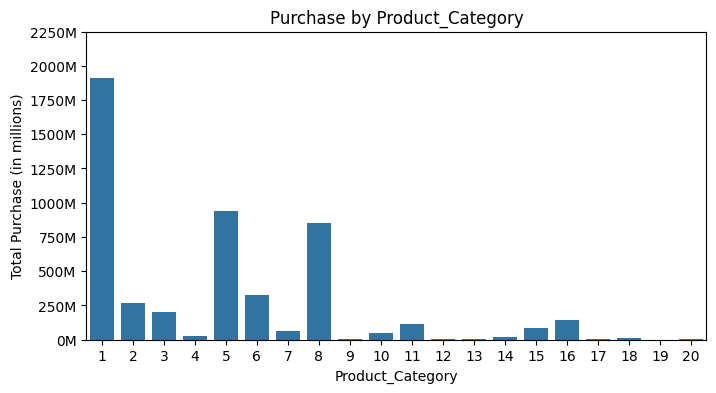

In [ ]:
col = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
for i in col:
    grouped_data = walmart.groupby(i)['Purchase'].sum()
    display(grouped_data)

    plt.figure(figsize=(8, 4))
    sns.barplot(x=grouped_data.index, y=grouped_data.values)
    plt.title(f'Purchase by {i}')
    plt.ylabel('Total Purchase (in millions)')
    plt.xlabel(i)
    plt.yticks(ticks=plt.yticks()[0], labels=[f'{int(tick/1e6)}M' for tick in plt.yticks()[0]])
    plt.show()
# for all the columns checking for the bifercation of the Purchase

In [ ]:
round(pd.crosstab(walmart.Gender, walmart.Product_Category, margins = True, normalize =True), 2)
# product 4, 5 and 1 are the products in which the Female purchase was bit heigher.

Product_Category,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,All
Gender,,,,,,,,,,,,,,,,,,,,,
F,0.05,0.01,0.01,0.01,0.08,0.01,0.00,0.06,0.0,0.00,...,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.25
M,0.21,0.03,0.03,0.01,0.20,0.03,0.01,0.15,0.0,0.00,...,0.00,0.01,0.0,0.01,0.01,0.0,0.01,0.0,0.0,0.75
All,0.26,0.04,0.04,0.02,0.28,0.04,0.01,0.21,0.0,0.01,...,0.01,0.01,0.0,0.01,0.02,0.0,0.01,0.0,0.0,1.00


Finding the correlation

In [ ]:
walmart_copy = walmart.copy()
walmart_copy['Gender'].replace(['M', 'F'], [2,1], inplace = True)
walmart_copy['City_Category'].replace(['A', 'B', 'C'], [1, 2, 3], inplace = True)
walmart_copy['Age'].replace(['0-17','18-25','26-35','36-45', '46-50', '51-55', '55+'], [1, 2, 3, 4, 5, 6, 7], inplace = True)
walmart_copy['Stay_In_Current_City_Years'].replace(['4+'], [4], inplace = True)

walmart_copy.drop('Product_ID',  axis = 1, inplace = True)
walmart_copy.drop('User_ID',  axis = 1, inplace = True)

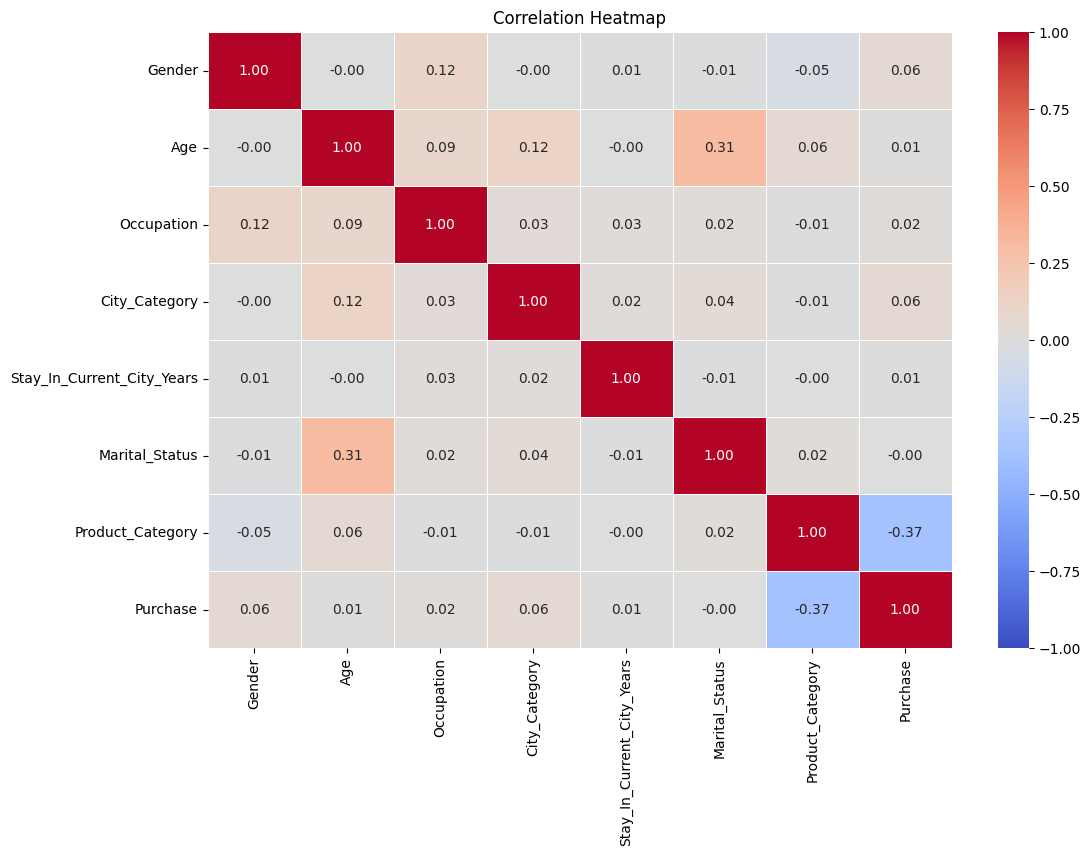

Features most correlated with Gender:
Occupation                    0.117155
Purchase                      0.060837
Product_Category              0.046426
Stay_In_Current_City_Years    0.014570
Name: Gender, dtype: float64


Features most correlated with Age:
Marital_Status      0.311756
City_Category       0.122545
Occupation          0.091625
Product_Category    0.060069
Name: Age, dtype: float64


Features most correlated with Occupation:
Gender                        0.117155
Age                           0.091625
City_Category                 0.034684
Stay_In_Current_City_Years    0.030100
Name: Occupation, dtype: float64


Features most correlated with City_Category:
Age               0.122545
Purchase          0.062341
Marital_Status    0.039533
Occupation        0.034684
Name: City_Category, dtype: float64


Features most correlated with Stay_In_Current_City_Years:
Occupation        0.030100
City_Category     0.019924
Gender            0.014570
Marital_Status    0.012788
Name: 

In [ ]:
corr = walmart_copy.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Insights from correlation matrix
for column in corr.columns:
    high_corr = corr[column].abs().sort_values(ascending=False)
    print(f"Features most correlated with {column}:")
    print(high_corr[1:5])  # Show top 5 correlations excluding itself
    print("\n")


#Insights:
- Sum of Male patient's purchase are higher than Female patients
- After testing we can understand that the spending habbit of male is significantly more than females.
- Where as there was no significant difference between the purchase behaviour between Married and Unmarried.
- most people belong to 26-35yrs Age category are those whose sum purchase are the highest
- occupation category with the most sum of purchase are 4, 0, 7 respectively
- city category with the most sum of purchase are B,C, A respectively
- Unmarried (0) people's sum purchase is more than Married(1) people
- Most revenue generated product category are 1, 5, 8 respectively
- the correlation between the purchase and all other columns are significantly low except gender and city category
- The amount spend by Male was way heigher than Female.

#Recomendation:-
- While outliers were removed, it's worth noting that these high-spending customers could represent a small but lucrative segment of the market, potentially worth targeting with premium offerings.
- Increase the availability of high-ticket items and premium products that are likely to appeal to male customers, especially in City Category B.
- Increase the availability of high-ticket items and premium products that are likely to appeal to male customers, especially in City Category B.
- Create targeted offers for customers in occupations that show higher spending, possibly through partnerships with companies or occupation-based discounts.
- Given the significant sales on Black Friday, develop holiday-specific product bundles or promotions that target the identified high-spending demographics.
- Ensure the stocks of the key category products which are moving fast.
